# Import Libraries

Include all necessary modules for analysis.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Read-In Data

We read the data in using the Pandas module for easy conversion from a CSV file format to an in-memory DataFrame.

Datasets from: http://insideairbnb.com/vancouver

In [61]:
airbnb = pd.read_csv("data/listings.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5970,845284101352923786,Private 2BR Suite close to Queen Elizabeth Park,504936838,Amandeep,NaN,Riley Park,49.237248,-123.104728,Entire home/apt,104,1,0,NaN,NaN,1,308,0,23-189107
5971,845854561820158781,One bedroom apartment,49461922,Neda,NaN,Mount Pleasant,49.269547,-123.110062,Entire home/apt,120,30,0,NaN,NaN,3,240,0,NaN
5972,845891831251005257,4 Bedroom house in Vancouver,97054642,Noor,NaN,Victoria-Fraserview,49.216332,-123.055613,Entire home/apt,339,1,0,NaN,NaN,2,358,0,23-195309
5973,845936827653470100,Stylish Zen Townhouse,3664868,Don,NaN,Kitsilano,49.259028,-123.156587,Private room,105,30,0,NaN,NaN,1,122,0,NaN
5974,845960950280088622,Fresh new modern A/C condo @ Queen Elizabeth Park,430820918,Valetina,NaN,Riley Park,49.242672,-123.116604,Entire home/apt,201,1,0,NaN,NaN,4,357,0,Exempt


In [63]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5970,845284101352923786,Private 2BR Suite close to Queen Elizabeth Park,504936838,Amandeep,NaN,Riley Park,49.237248,-123.104728,Entire home/apt,104,1,0,NaN,NaN,1,308,0,23-189107
5971,845854561820158781,One bedroom apartment,49461922,Neda,NaN,Mount Pleasant,49.269547,-123.110062,Entire home/apt,120,30,0,NaN,NaN,3,240,0,NaN
5972,845891831251005257,4 Bedroom house in Vancouver,97054642,Noor,NaN,Victoria-Fraserview,49.216332,-123.055613,Entire home/apt,339,1,0,NaN,NaN,2,358,0,23-195309
5973,845936827653470100,Stylish Zen Townhouse,3664868,Don,NaN,Kitsilano,49.259028,-123.156587,Private room,105,30,0,NaN,NaN,1,122,0,NaN
5974,845960950280088622,Fresh new modern A/C condo @ Queen Elizabeth Park,430820918,Valetina,NaN,Riley Park,49.242672,-123.116604,Entire home/apt,201,1,0,NaN,NaN,4,357,0,Exempt


# Analysis

Analyze the data to gain a better understanding of it and locate any emerging trends.

In [31]:
# Summary statistics of quantitative features of the dataset
airbnb.drop(["id", "host_id", "neighbourhood_group"], axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,4940.000000,5975.000000,5975.000000,5975.000000
mean,49.263760,-123.112078,217.421757,17.361339,37.731381,1.623176,7.311632,139.216904,12.653389
std,0.020279,0.037324,1087.709532,32.705775,67.994988,1.727232,17.694416,120.738639,19.908634
min,49.202960,-123.217730,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,49.251780,-123.130821,101.000000,2.000000,2.000000,0.310000,1.000000,31.000000,0.000000
50%,49.270278,-123.116180,149.000000,3.000000,10.000000,0.990000,1.000000,105.000000,3.000000
75%,49.279238,-123.091415,219.000000,30.000000,44.000000,2.500000,3.000000,236.500000,17.500000
max,49.294360,-123.023680,77178.000000,399.000000,863.000000,18.090000,102.000000,365.000000,166.000000


Distribution of room types.

room_type
Entire home/apt    4921
Hotel room            3
Private room       1025
Shared room          26
Name: id, dtype: int64

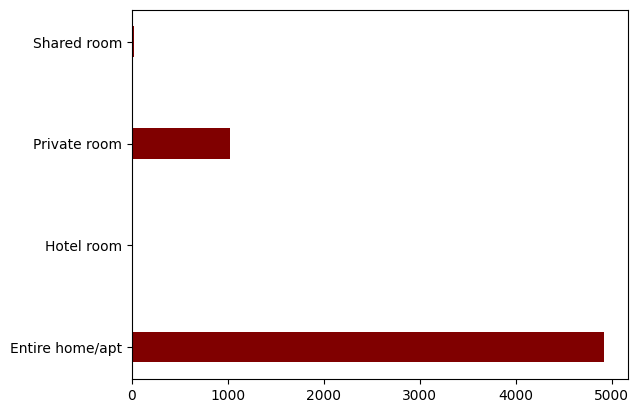

In [107]:
room_types = airbnb.groupby("room_type")["id"].aggregate("count")
plt.barh(room_types.index, room_types, color="maroon", height=0.3)
room_types

# Visualization

Plot findings on a read-world map using latitude and longitude coordinates with the Folium module.

In [103]:
airbnb_head = airbnb.head()
map_airbnb = folium.Map([airbnb_head.latitude[0], airbnb_head.longitude[0]], zoom_start=12)
for index, listing in airbnb_head.iterrows():
    folium.Marker([listing['latitude'], listing['longitude']],
                        popup=listing[['name','latitude','longitude']],
                        radius=5,
                        color="red",
                       ).add_to(map_airbnb)
map_airbnb

In [50]:
#map_airbnb.save('map-airbnb.html')